In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
d=pd.read_csv('/content/drive/MyDrive/Datasets/advertising.csv')
d

Mounted at /content/drive


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<Axes: xlabel='TV', ylabel='Sales'>

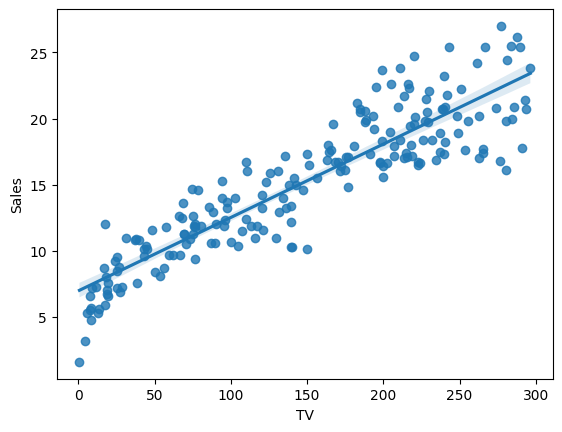

In [2]:
import seaborn as sns
sns.regplot(x='TV',y='Sales',data=d)

<Axes: xlabel='Radio', ylabel='Sales'>

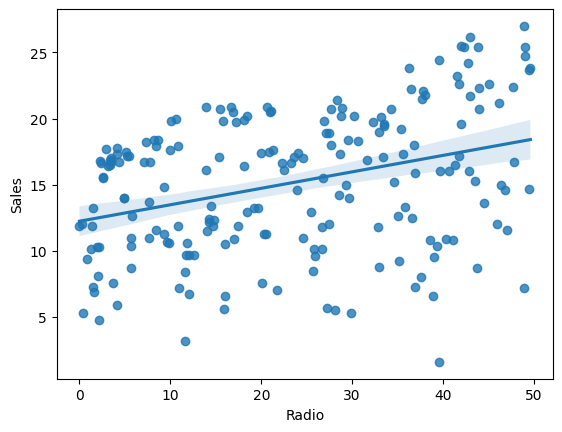

In [3]:
sns.regplot(x='Radio',y='Sales',data=d)

<Axes: xlabel='Newspaper', ylabel='Sales'>

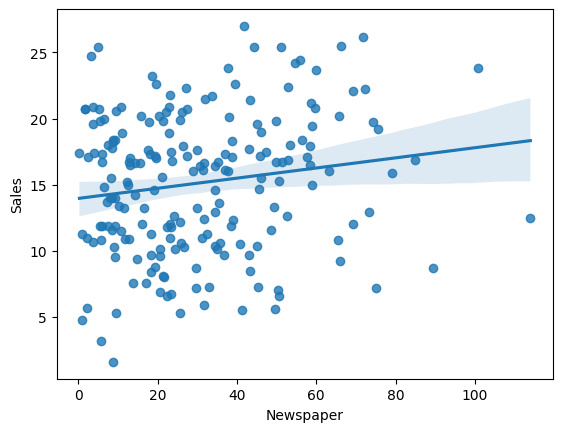

In [4]:
sns.regplot(x='Newspaper',y='Sales',data=d)

In [5]:
d.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [6]:
d.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [7]:
X=d.iloc[:,:-1]
y=d.iloc[:,-1]


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
X_test.shape,y_test.shape

((60, 3), (60,))

In [10]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred=mlr.predict(X_test)
y_pred

array([21.28816103, 18.04213212, 10.0595901 , 21.08224067, 20.76476044,
       24.47187353, 16.80643646, 15.62885738, 10.12479884, 18.84601896,
       15.78389695, 10.54297035, 18.92928707, 15.52557996, 17.8412711 ,
       15.24120343, 13.74212833, 21.0643733 , 10.05392699, 19.26500889,
       11.16451173, 11.97211832,  8.61179009, 11.98972141, 12.59914023,
       16.8447954 ,  9.7170889 , 21.09489946, 18.13942474, 19.55008709,
       22.08796224, 17.78527998, 16.53883452, 14.77303861, 21.39458945,
       16.95491635, 17.22755002, 12.31866943, 21.04982199,  7.77473926,
        5.38467516,  9.63139004,  6.89549204, 19.19507436,  7.88125192,
       15.18766673, 13.70978421, 21.0232936 , 20.5350058 , 20.48867548,
       24.86087902, 14.96304281,  7.33545571, 19.35630325, 21.32554066,
       14.7719757 , 17.19642519,  7.11988693, 18.30096543,  9.65158222])

In [12]:
X_test

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0
198,283.6,42.0,66.2
95,163.3,31.6,52.9
4,180.8,10.8,58.4
29,70.6,16.0,40.8
168,215.4,23.6,57.6


In [13]:
mlr.coef_

array([ 0.05502392,  0.10251003, -0.00150711])

In [14]:
mlr.intercept_

4.661439720130817

In [15]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print('R2 score:',r2_score(y_test,y_pred))
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Mean absolute percentage error:',mean_absolute_percentage_error(y_test,y_pred))

R2 score: 0.9071151423684273
Mean absolute error: 1.194741713405674
Mean squared error: 2.370659971225658
Mean absolute percentage error: 0.0769508078872673


In [16]:
y_new=mlr.predict([[33.4,22.7,28]])
y_new.item

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<function ndarray.item>